<a href="https://colab.research.google.com/github/dgnsaglam/Misc/blob/main/yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [15]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Forecasting Stocks from Yahoo Finance with Prophet

In [16]:
import yfinance as yf
import pandas as pd
import datetime
import time

startTime = datetime.datetime(2022, 7, 16) 
endDate = datetime.datetime(2022, 8, 15, 16) 
hist = pd.DataFrame()
day = datetime.timedelta(days=1)
while (startTime <= endDate) :
  endTime = startTime + day
  data = yf.download(tickers="GNRC", start=startTime, end=endTime, interval="1m")
  print (len(data.index))
  hist = pd.concat([hist, data]) 
  startTime += day
  time.sleep(2)

hist.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GNRC: 1m data not available for startTime=1657929600 and endTime=1658016000. The requested range must be within the last 30 days.
0
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GNRC: No data found for this date range, symbol may be delisted
0
[*********************100%***********************]  1 of 1 completed
355
[*********************100%***********************]  1 of 1 completed
349
[*********************100%***********************]  1 of 1 completed
376
[*********************100%***********************]  1 of 1 completed
347
[*********************100%***********************]  1 of 1 completed
373
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GNRC: No data found for this date range, symbol may be delisted
0
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GNRC: N

,Open,High,Low,Close,Adj Close,Volume
2022-07-18 09:30:00-04:00,221.789993,221.899994,220.029999,220.815002,220.815002,13176.0
2022-07-18 09:31:00-04:00,220.964996,221.998505,220.279999,221.475006,221.475006,7252.0
2022-07-18 09:32:00-04:00,221.970001,223.770004,221.470001,222.625000,222.625000,9632.0
2022-07-18 09:33:00-04:00,222.705002,223.380005,222.649994,222.649994,222.649994,6945.0
2022-07-18 09:34:00-04:00,223.005005,223.559906,222.467499,223.000000,223.000000,2898.0


In [17]:
hist.to_csv("GNRC Jul-Aug 2022.csv", sep='\t', encoding='utf-8')

In [18]:
from google.colab import files
files.download("GNRC Jul-Aug 2022.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:

df = pd.DataFrame()

df['ds'] = hist.index.tz_localize(None)
df['y'] = hist['Close'].values
df.tail()

,ds,y
7478,2022-08-15 15:25:00,273.535004
7479,2022-08-15 15:27:00,273.239990
7480,2022-08-15 15:28:00,273.189606
7481,2022-08-15 15:29:00,273.295013
7482,2022-08-15 15:30:15,273.125000


In [22]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.7 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [26]:
from prophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l8kc0jq/ue0gs25l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l8kc0jq/x6udr7yb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22454', 'data', 'file=/tmp/tmp5l8kc0jq/ue0gs25l.json', 'init=/tmp/tmp5l8kc0jq/x6udr7yb.json', 'output', 'file=/tmp/tmpwtk08b_4/prophet_model-20220815195315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:53:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:53:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future = m.make_future_dataframe(7, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
7483,2022-08-16 15:30:15,266.274762,259.684927,273.671068
7484,2022-08-17 15:30:15,281.106702,255.174811,305.127414
7485,2022-08-18 15:30:15,289.722615,240.373479,337.577172
7486,2022-08-19 15:30:15,300.286641,221.420507,379.511986
7487,2022-08-20 15:30:15,301.336648,189.432924,417.263222
7488,2022-08-21 15:30:15,297.562763,147.765572,454.766557
7489,2022-08-22 15:30:15,293.525816,101.793265,489.034494


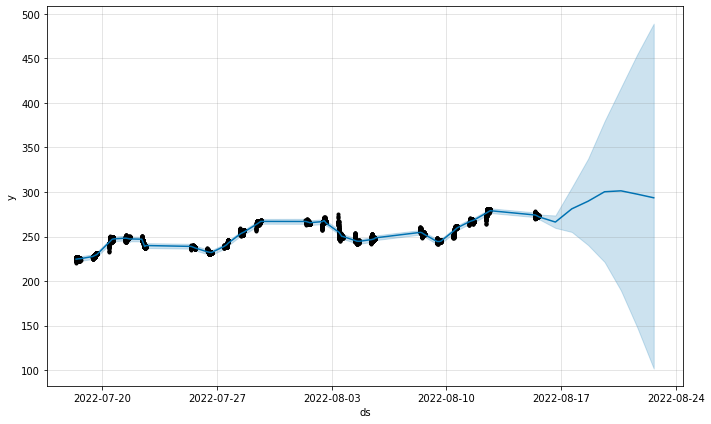

In [28]:
m.plot(forecast);

## Make it a Function

In [ ]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

In [ ]:
# kkr real estate finance trust
make_forecast('KREF', 180)

In [ ]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

In [ ]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast